# Rootfinding

The current implementation for finding the roots of a given function $f(z)$ within a [given initial contour](contour.ipynb#Contours) $C_0$ is primarily based on [1] and is briefly described as follows.
First define a set of contours $\mathcal{C}$ which initially contains only the original contour $C_0$ and [compute the number of zeros](contour.ipynb#Computing-roots-within-a-contour), $N_0$, within this initial contour.  Then perform the following steps:

1. Choose a contour, $C$, to remove from $\mathcal{C}$ and [compute the number of zeros](contour.ipynb#Computing-roots-within-a-contour), $N$, within it.  This step relies on Cauchy's argument principle,

   \begin{equation} 
   N = \frac{1}{2\pi i} \oint_C \frac{f'(z)}{f(z)}.
   \end{equation}

   If $f(z)$ and $f'(z)$ are provided by the user then the integral is directly computed using [SciPy's Romberg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html) implementation. If only $f(z)$ is given then $N$ is calculated using the difference in the argument of $f(z)$ as it is numerically continued around the contour $C$ [2,4].

2. If...
  * $N=0$ then discard the contour.
  * $N>1$ then subdivide the contour further and add the new, smaller, contours to $\mathcal{C}$.
  * $N=1$ then attempt to find the root via an interative method with the initial guess for the root being a random point within the contour.  This is repeated a user specified number of times (20 by default) at which point if the root has not been found then the box is subdivided again.  The iterative method used is Newton-Raphson if $f'(z)$ is given and the Secant method if otherwise.
        
3. If the number of known roots is equal to $N_0$ then return the list of roots to the user.  Otherwise, return to step 1.

#### References

[1] M. Dellnitz, O. Schütze and Q. Zheng "Locating all the Zeros of an Analytic Function in one Complex Variable", 2002, J. Compu. and App. Math., Vol. 138, Issue. 2, pp. 325-333

[2] L. M. Delves and J. N. Lyness "A Numerical Method for Locating the Zeros of an Analytic Function", 1967, Mathematics of Computation, Vol. 21, No. 100, pp. 543-560

[3] P. Kravanja and M. Van Barel "Derivative-free algorithm for computing zeros of analytic functions", 1999, Computing, Vol. 63, pp.69-91

[4] F. D. Gakhov "Boundary value problems", section 12 (2014), Elsevier.

# Use

From a user perspective the first step is to define an [initial contour](contour.ipynb#Contours) in the complex plane which can be a 

   * [Circle](contour.ipynb#Circle)
   * [Annulus](contour.ipynb#Annulus)
   * [Rectangle](contour.ipynb#Rectangle)
   * [Rectangle in polar coordinates](contour.ipynb#Rectangle-in-polar-coordinates)

This contour, together with a function $f(z)$ (and ideally it's derivative $f'(z)$) can then be passed to the ['findRoots'](#findRoots) function.
The list of roots can also be directly plotted with the ['showRoots'](#showRoots) function.
The rootfinding process can be demonstrated with ['demo_findRoots'](#demo_findRoots).

#### findRoots

In [1]:
from cxroots import Circle, findRoots
from numpy import sin, cos

C = Circle(0, 1)
f  = lambda z: z**2+sin(z)+1
df = lambda z: 2*z+cos(z)
findRoots(C, f, df)

((-0.48837432532445041+0.78548140989504933j),
 (-0.48837432532445046-0.78548140989504933j))

#### showRoots

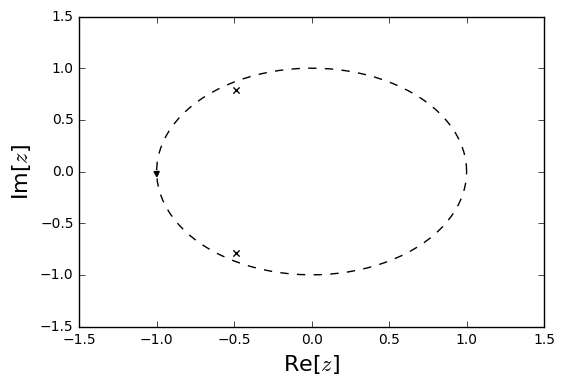

In [2]:
from cxroots import showRoots
showRoots(C, f, df)

#### demo_findRoots

#### findRootsGen